Riya & Austin<br/>Section 3

# Question

# Model

### Setting up the environment

In [73]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [74]:
'''
S: Susceptible
Q: Quarantine
C: Coming to class
R: Recovered
D: Dead XP
'''

init = State(S=190, Q=0, C=1, R=0, D=0)

,values
S,190
Q,0
C,1
R,0
D,0


In [75]:
'''
i: contagion rate
p: proportion quarantined
g: "go home" rate (a.k.a. C->Q rate)
alpha: quarantined recovery rate
beta: quarantined death rate
gamma: coming to class recovery rate
sigma: coming to class death rate
'''

system = System(
    i=1,
    p=0.4,
    g=0.6,
    alpha=0.4,
    beta=0.1,
    gamma=0.001,
    sigma=0.3
)

,values
i,1.000
p,0.400
g,0.600
alpha,0.400
beta,0.100
gamma,0.001
sigma,0.300


In [76]:
def update_func(state, system, dt=1):
    unpack(state)
    unpack(system)
    
    if S <= 0:
        delta = 0
    else:
        delta = i/S

    infections = min([S * C*delta, S])
    recoveries = min([Q*alpha + C*gamma, 190])
    deaths     = min([Q*beta + C*sigma, 190])
    
    dSdt = -infections * dt
    dQdt = (infections * p + C*g - Q*alpha - Q*beta) * dt
    dCdt = (infections * (1-p) - C*gamma - C*sigma) * dt
    dRdt = (recoveries) * dt
    dDdt = (deaths) * dt
    
    s,q,c,r,d = S,Q,C,R,D
    
    return State(
        S = s + dSdt,
        Q = q + dQdt,
        C = c + dCdt,
        R = r + dRdt,
        D = d + dDdt
    )

In [77]:
def run_simulation(system, init, t_end, dt):
    unpack(system)
    
    results = TimeFrame(columns=init.index)
    results.row[0] = init
    
    for t in linrange(0, t_end, dt):
        results.row[t+dt] = update_func(results.row[t], system, dt)
    
    return results

In [78]:
def plot_results(results):
    plot(results['S'], '-', label='Susceptible')
    plot(results['C'], '--', label='Coming to class')
    plot(results['Q'], ':', label='Quarantined')
    plot(results['R'], '.-', label='Recovered')
    plot(results['D'], '.', label='Dead')
    decorate(xlabel='Time (days)', ylabel='Population')

          S        Q        C         R        D
0       190        0        1         0        0
1       189        1    1.299     0.001      0.3
2   187.701    1.799   1.6874  0.402299   0.7897
3   186.014   2.5869  2.19193   1.12359  1.47582
4   183.822  3.48538  2.84732   2.16054  2.39209
5   180.974  4.59001  3.69867   3.55754  3.59483
6   177.276  5.99368  4.80457   5.39724  5.16343
7   172.471  7.80141  6.24114   7.79952  7.20417
8    166.23  10.1418  8.10724   10.9263  9.85665
9   158.123  13.1782  10.5313   14.9912   13.303
10  147.591  17.1204  13.6802    20.273  17.7802
11  133.911  22.2404  17.7705   27.1348  23.5963
12  116.141  28.8907  23.0839   36.0487  31.1515
13  93.0568  37.5293   29.986   47.6281  40.9658
14  63.0707  48.7507  38.9519   62.6698  53.7145
15  24.1189  63.3272  50.5985    82.209  70.2751
16        0  71.6702  49.8396   107.591  91.7874
17        0  65.7389  34.8379   136.308  113.906
18        0  53.7722  24.3517   162.639  130.932
19        0  41.4971

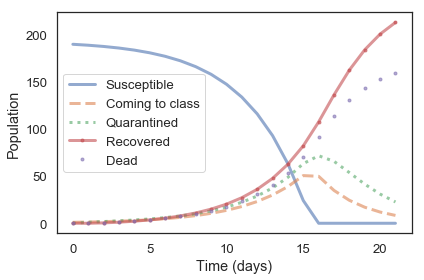

In [79]:
results = run_simulation(system, init, 21, 1)
plot_results(results)
print(results)

# Results

# Interpretation